# A visual methodology to assess spatial graph vertex ordering algorithms

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import pickle
with open("forward.pkl", "rb") as file:
    cities_forward = pickle.load(file)

with open("inverse.pkl", "rb") as file:
    cities_inverse = pickle.load(file)

## Forward Approach

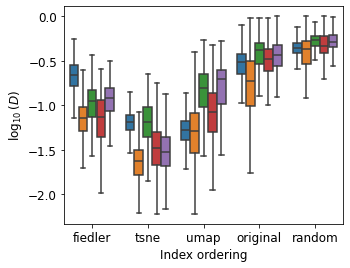

In [214]:
data = cities_forward

# Create empty lists for each column
keys_outer = []
keys_inner = []
values = []

# Iterate over the outer dictionary
for key_outer, inner_dict in data.items():
    # Iterate over the inner dictionary
    # if key_outer in ['original','random']:
    #     continue
    for key_inner, value_list in inner_dict.items():
        # Iterate over the values in the list
        if key_inner == "Santiago":
            continue
        for value in value_list:
            # Append the values to the corresponding lists
            keys_outer.append(key_outer)
            keys_inner.append(key_inner)
            values.append(value)

# Create a pandas DataFrame
df = pd.DataFrame({'Index ordering': keys_outer, 'City': keys_inner, 'Diagonals lengths': values})

# Normalize the diagonal lengths
for city in df['City'].unique():
    series = df['Diagonals lengths'][df['City'] == city]
    df.loc[df['City'] == city, 'Diagonals lengths'] = (series - series.min()) / (series.max() - series.min())

# Apply logarithmic scale transformation
df['Log Diagonals lengths'] = df['Diagonals lengths'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

plt.figure(figsize=(5, 4))
ax = sns.boxplot(x=df['Index ordering'], y=df['Log Diagonals lengths'], hue=df['City'], showfliers=False)

#ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend().remove()


plt.xlabel('Index ordering', fontsize='large')
plt.ylabel('$\log_{10}(D)$', fontsize='large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

plt.savefig('cities_forward_log.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()


## Inverse approach

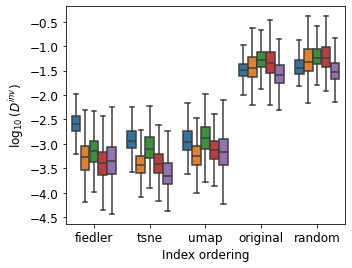

In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = cities_inverse

# Create empty lists for each column
keys_outer = []
keys_inner = []
values = []

# Iterate over the outer dictionary
for key_outer, inner_dict in data.items():
    # if key_outer in ['original','random']:
    #     continue
    # Iterate over the inner dictionary
    for key_inner, value_list in inner_dict.items():
        # Iterate over the values in the list
        if key_inner == "Santiago":
            continue
        for value in value_list:
            # Append the values to the corresponding lists
            keys_outer.append(key_outer)
            keys_inner.append(key_inner)
            values.append(value)

# Create a pandas DataFrame
df = pd.DataFrame({'Index ordering': keys_outer, 'City': keys_inner, 'Normalized diameters': values})

# Normalize the diameters
for city in df['City'].unique():
    series = df['Normalized diameters'][df['City'] == city]
    df.loc[df['City'] == city, 'Normalized diameters'] = (series - series.min()) / (series.max() - series.min())

# Apply logarithmic scale transformation
df['Normalized diameters'] = df['Normalized diameters'].replace(0, np.nan)  # Replace 0s with NaN to avoid log(0)
df['Log Normalized diameters'] = np.log10(df['Normalized diameters'])

plt.figure(figsize=(5, 4))
ax = sns.boxplot(x=df['Index ordering'], y=df['Log Normalized diameters'], hue=df['City'], showfliers=False)

plt.legend().remove()
#plt.ylabel('$\log_{10}(D^{inv})$')

plt.xlabel('Index ordering', fontsize='large')
plt.ylabel('$\log_{10}(D^{inv})$', fontsize='large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

# ax.legend(loc='upper left', bbox_to_anchor=(0.60, 0.98))
plt.savefig('cities_inverse_log.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()


##  Inverse approach with outliers

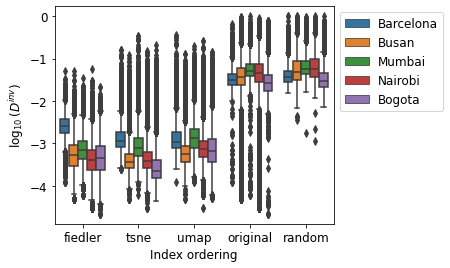

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = cities_inverse

# Create empty lists for each column
keys_outer = []
keys_inner = []
values = []

# Iterate over the outer dictionary
for key_outer, inner_dict in data.items():
    # if key_outer in ['original','random']:
    #     continue
    # Iterate over the inner dictionary
    for key_inner, value_list in inner_dict.items():
        # Iterate over the values in the list
        if key_inner == "Santiago":
            continue
        for value in value_list:
            # Append the values to the corresponding lists
            keys_outer.append(key_outer)
            keys_inner.append(key_inner)
            values.append(value)

# Create a pandas DataFrame
df = pd.DataFrame({'Index ordering': keys_outer, 'City': keys_inner, 'Normalized diameters': values})

# Normalize the diameters
for city in df['City'].unique():
    series = df['Normalized diameters'][df['City'] == city]
    df.loc[df['City'] == city, 'Normalized diameters'] = (series - series.min()) / (series.max() - series.min())

# Apply logarithmic scale transformation
df['Log Normalized diameters'] = df['Normalized diameters'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

plt.figure(figsize=(5, 4))
ax = sns.boxplot(x=df['Index ordering'], y=df['Log Normalized diameters'], hue=df['City'], showfliers=True)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='large')

plt.xlabel('Index ordering', fontsize='large')
plt.ylabel('$\log_{10}(D^{inv})$', fontsize='large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

plt.savefig('cities_inverse_log_fliers.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()


## Forward approach: comparison of the three methods against baseline

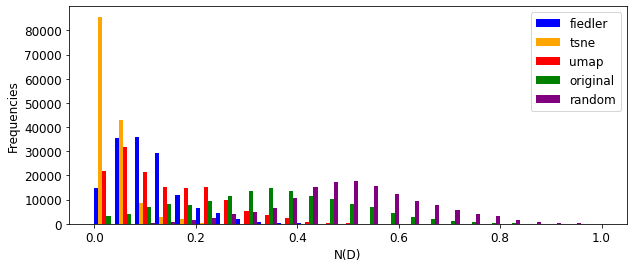

In [277]:
import matplotlib.pyplot as plt
import numpy as np

# Criar listas vazias para armazenar os dados de todas as cidades
all_diagonals_fiedler = []
all_diagonals_tsne = []
all_diagonals_umap = []
all_diagonals_original = []
all_diagonals_random = []

# Iterar sobre todas as cidades
for city in df['City'].unique():
    Busan_df = df[df['City'] == city]
    all_diagonals_fiedler.extend(Busan_df[Busan_df['Index ordering'] == 'fiedler']['Diagonals lengths'])
    all_diagonals_tsne.extend(Busan_df[Busan_df['Index ordering'] == 'tsne']['Diagonals lengths'])
    all_diagonals_umap.extend(Busan_df[Busan_df['Index ordering'] == 'umap']['Diagonals lengths'])
    all_diagonals_original.extend(Busan_df[Busan_df['Index ordering'] == 'original']['Diagonals lengths'])
    all_diagonals_random.extend(Busan_df[Busan_df['Index ordering'] == 'random']['Diagonals lengths'])

# Calcular a média dos histogramas
mean_diagonals_fiedler = np.mean(all_diagonals_fiedler)
mean_diagonals_tsne = np.mean(all_diagonals_tsne)
mean_diagonals_umap = np.mean(all_diagonals_umap)
mean_diagonals_original = np.mean(all_diagonals_original)
mean_diagonals_random = np.mean(all_diagonals_random)

# Plotar o histograma médio
plt.figure(figsize=(10, 4))
plt.hist([all_diagonals_fiedler, all_diagonals_tsne, all_diagonals_umap, all_diagonals_original, all_diagonals_random],
         bins=25, label=['fiedler', 'tsne', 'umap', 'original', 'random'],
         color=['blue', 'orange', 'red', 'green', 'purple'], range=[0, 1], rwidth=1.7)

# Configurações de fonte aumentada
plt.legend(loc='upper right', fontsize='large')
plt.xlabel('N(D)', fontsize='large')
plt.ylabel('Frequencies', fontsize='large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

#plt.title('Joint of all cities with all methods', fontsize='large')
plt.savefig('Fig10norm.pdf', dpi=300, format='pdf', bbox_inches='tight')

plt.show()


## Forward approach comparison by city

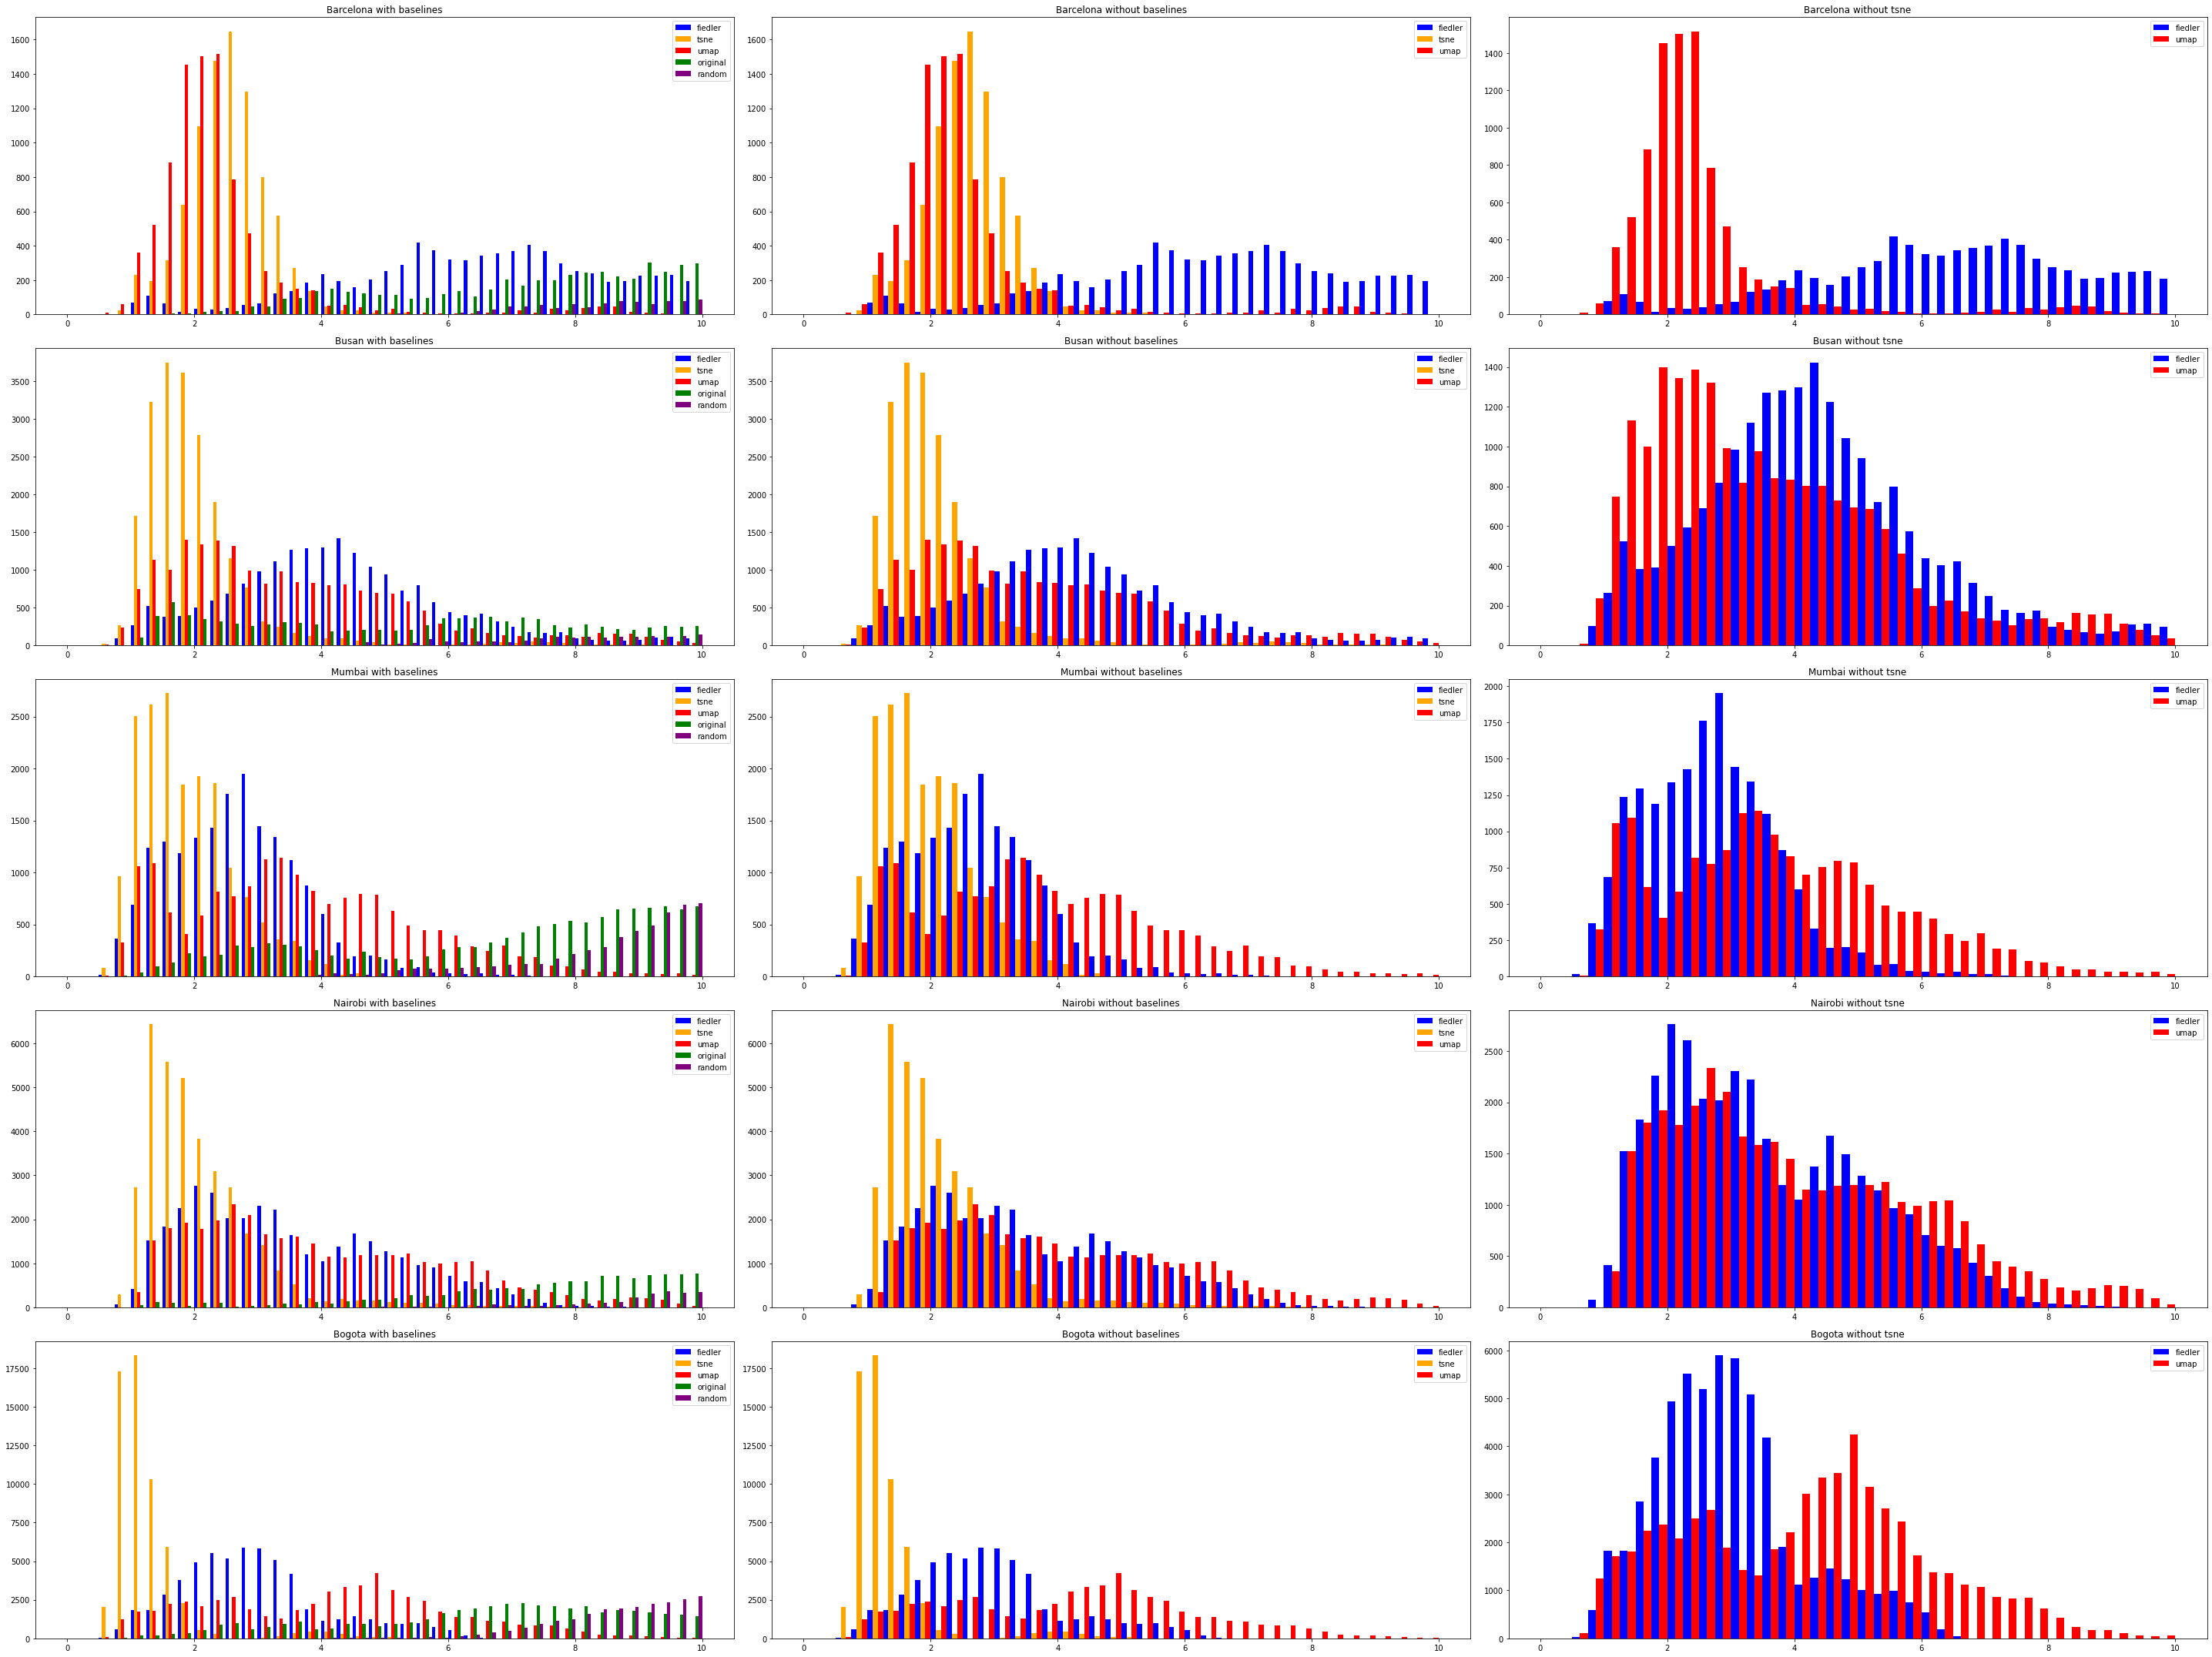

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# Supongamos que tienes tu DataFrame `df` ya cargado.

# Determinar el número de ciudades únicas
unique_cities = df['City'].unique()
num_cities = len(unique_cities)

# Configurar el tamaño de la cuadrícula de subgráficos (por ejemplo, 3 columnas, con una fila por cada ciudad y cada versión (con y sin baselines))
num_cols = 3
num_rows = num_cities  # Tres filas por cada ciudad

# Crear la figura y los subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 6 * num_cities))
axes = axes.flatten()  # Aplanar el array de subgráficos para facilitar la iteración

for i, city in enumerate(unique_cities):
    Busan_df = df[df['City'] == city]
    diagonals_fiedler = Busan_df[Busan_df['Index ordering'] == 'fiedler']['Diagonals lengths']
    diagonals_tsne = Busan_df[Busan_df['Index ordering'] == 'tsne']['Diagonals lengths']
    diagonals_umap = Busan_df[Busan_df['Index ordering'] == 'umap']['Diagonals lengths']
    diagonals_original = Busan_df[Busan_df['Index ordering'] == 'original']['Diagonals lengths']
    diagonals_random = Busan_df[Busan_df['Index ordering'] == 'random']['Diagonals lengths']
    
    # Plot with baselines
    ax_with_baselines = axes[i * 3]
    ax_with_baselines.hist([diagonals_fiedler, diagonals_tsne, diagonals_umap, diagonals_original, diagonals_random], 
                           bins=40, label=['fiedler', 'tsne', 'umap', 'original', 'random'], 
                           color=['blue', 'orange', 'red', 'green', 'purple'], 
                           range=[0, 10], rwidth=1.7)
    ax_with_baselines.legend(loc='upper right')
    ax_with_baselines.set_title(city + ' with baselines')
    
    # Plot without baselines
    ax_without_baselines = axes[i * 3 + 1]
    ax_without_baselines.hist([diagonals_fiedler, diagonals_tsne, diagonals_umap], 
                              bins=40, label=['fiedler', 'tsne', 'umap'], 
                              color=['blue', 'orange', 'red'], 
                              range=[0, 10], rwidth=1.7)
    ax_without_baselines.legend(loc='upper right')
    ax_without_baselines.set_title(city + ' without baselines')
    
    # Plot without tsne
    ax_without_tsne = axes[i * 3 + 2]
    ax_without_tsne.hist([diagonals_fiedler, diagonals_umap], 
                              bins=40, label=['fiedler', 'umap'], 
                              color=['blue', 'red'], 
                              range=[0, 10], rwidth=1.7)
    ax_without_tsne.legend(loc='upper right')
    ax_without_tsne.set_title(city + ' without tsne')

# Eliminar subgráficos vacíos si el número de ciudades no llena completamente la cuadrícula
total_plots = num_cities * 3
for j in range(total_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Guardar en un archivo PDF
with PdfPages('city_histograms.pdf') as pdf:
    pdf.savefig(fig)

plt.show()
